In [1]:
import numpy as np
import pandas as pd


In [2]:

data=pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [3]:
data.shape

(1000, 2)

In [4]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [7]:
import nltk #Natural Language Toolkit used for NLP
import re   #Used to work with regular expressions
nltk.download('stopwords')    #nltk corpus is massive dump of all kind of natural language dataset
from nltk.corpus import stopwords   #stopword is commonly used word(such as 'a','an','the','in') that a search engine has been programmed to ignore
from nltk.stem.porter import PorterStemmer    #Porter Stemmer is used for data mining and Information Retrieval


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neela\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#clean the reviews
corpus=[]
for i in range(0,1000):
    #Cleaning special characters from the review
    review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])
    #converting entire review into lower case
    review=review.lower()
    #Tokenizing the review by words
    review_words=review.split()
    #Stemming the words
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review_words]
    #joining the stemmed words
    review=' '.join(review)
    #Creating a corpus
    corpus.append(review)

In [9]:
corpus[:1500]

['wow love thi place',
 'crust is not good',
 'not tasti and the textur wa just nasti',
 'stop by dure the late may bank holiday off rick steve recommend and love it',
 'the select on the menu wa great and so were the price',
 'now i am get angri and i want my damn pho',
 'honeslti it didn t tast that fresh',
 'the potato were like rubber and you could tell they had been made up ahead of time be kept under a warmer',
 'the fri were great too',
 'a great touch',
 'servic wa veri prompt',
 'would not go back',
 'the cashier had no care what so ever on what i had to say it still end up be wayyy overpr',
 'i tri the cape cod ravoli chicken with cranberri mmmm',
 'i wa disgust becaus i wa pretti sure that wa human hair',
 'i wa shock becaus no sign indic cash onli',
 'highli recommend',
 'waitress wa a littl slow in servic',
 'thi place is not worth your time let alon vega',
 'did not like at all',
 'the burritto blah',
 'the food amaz',
 'servic is also cute',
 'i could care less the inter

In [10]:
#create the bag of words model
from sklearn.feature_extraction.text import CountVectorizer   #CountVectorizer convers text to numerical data
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=data.iloc[:,1].values

In [11]:
#Split Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
#Random state sends seed to random generator, so that train-test split is always deterministic. In case you don't set seed then it will be different each time



In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(random_state=0)
classifier.fit(X_train,y_train)


RandomForestClassifier(random_state=0)

In [14]:
#Predicting test set results
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0], dtype=int64)

In [15]:
#Accuracy, Precision and Recall
#Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1=accuracy_score(y_test,y_pred)
score2=precision_score(y_test,y_pred)
score3=recall_score(y_test,y_pred)

print("Scores")
print("Accuracy Score is {}%".format(round(score1*100,2)))
print("Precision Score is {}%".format(round(score2*100,2)))

Scores
Accuracy Score is 82.0%
Precision Score is 87.64%


In [16]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[86, 11],
       [25, 78]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Label')

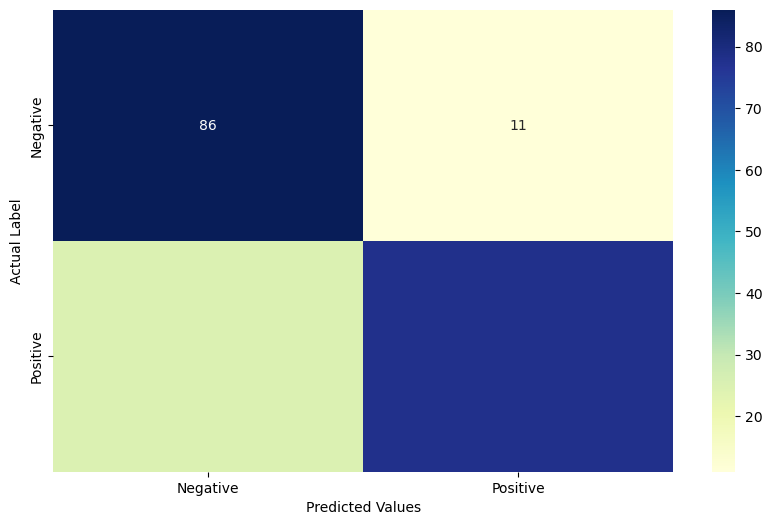

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Label")

In [ ]:
#HyperParameter tuning the Naive Bayes Classifier
best_accuracy=0.0
alpha_val=0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier=RandomForestClassifier(random_state=0)
    temp_classifier.fit(X_train,y_train)
    temp_y_pred= temp_classifier.predict(X_test)
    score=accuracy_score(y_test,temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1),round(score*100,2)))
    if score>best_accuracy:
        best_accuracy=score
        alpha_val=i
print("-------------------------------------------")
print("The best accuracy score is {}% for alpha value as {}".format(round(best_accuracy*100,2),round(alpha_val,1)))

In [ ]:
classifier=RandomForestClassifier(random_state=0)
classifier.fit(X_train,y_train)

In [ ]:
#Building a predictive system
def predict_sentiment(sample_review):
    sample_review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sample_review)
    sample_review=sample_review.lower()
    sample_review_words=sample_review.split()
    ps=PorterStemmer()
    final_review=[ps.stem(word) for word in sample_review_words]
    final_review=' '.join(final_review)
    
    temp=cv.transform([final_review]).toarray()
    return classifier.predict(temp)

In [ ]:
samplereview=str(input())
if(predict_sentiment(samplereview)):
    print("This is a positive review")
else:
    print("This is a negative review")

In [ ]:
samplereview=str(input())
if(predict_sentiment(samplereview)):
    print("This is a positive review")
else:
    print("This is a negative review")